In [1]:
# Problem Statement : New York City Taxi Trip Duration
# https://www.kaggle.com/competitions/nyc-taxi-trip-duration

# **Importing the Libraries**

In [3]:
!pip install gmaps

In [4]:
import re
import math
import time
import gmaps
import random
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif

import warnings
warnings.filterwarnings('ignore')

# **Reading the Datasets**

In [5]:
TrainData = pd.read_csv("train.csv")
TestData = pd.read_csv("test.csv")

#TrainData = pd.read_csv("/content/drive/MyDrive/Datasets/NewYork Trip Duration/train.csv")
#TestData = pd.read_csv("/content/drive/MyDrive/Datasets/NewYork Trip Duration/test.csv")

# **Printing the Data**

In [6]:
TrainData.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [7]:
TestData.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


# **Data Preprocessing and Feature Engineering**

In [8]:
print(TrainData.nunique())

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64


In [9]:
print("TrainData Shape : ", TrainData.shape)
print("TestData Shape : ", TestData.shape)

TrainData Shape :  (1458644, 11)
TestData Shape :  (625134, 9)


In [10]:
print("TrainData Columns : ", TrainData.columns)
print("\n")
print("TestData Columns : ", TestData.columns)

TrainData Columns :  Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')


TestData Columns :  Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag'],
      dtype='object')


In [11]:
print(TrainData.info())
print(TestData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dty

In [12]:
print("Missing Values TrainData : \n",TrainData.isnull().sum())
print("\nMissing Values TestData : \n",TestData.isnull().sum())

Missing Values TrainData : 
 id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

Missing Values TestData : 
 id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64


In [13]:
round(TrainData.describe())

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.0,1458644.0,1458644.0,1458644.0,1458644.0,1458644.0,1458644.0
mean,2.0,2.0,-74.0,41.0,-74.0,41.0,959.0
std,0.0,1.0,0.0,0.0,0.0,0.0,5237.0
min,1.0,0.0,-122.0,34.0,-122.0,32.0,1.0
25%,1.0,1.0,-74.0,41.0,-74.0,41.0,397.0
50%,2.0,1.0,-74.0,41.0,-74.0,41.0,662.0
75%,2.0,2.0,-74.0,41.0,-74.0,41.0,1075.0
max,2.0,9.0,-61.0,52.0,-61.0,44.0,3526282.0


In [14]:
round(TestData.describe())

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,625134.0,625134.0,625134.0,625134.0,625134.0,625134.0
mean,2.0,2.0,-74.0,41.0,-74.0,41.0
std,0.0,1.0,0.0,0.0,0.0,0.0
min,1.0,0.0,-122.0,37.0,-122.0,37.0
25%,1.0,1.0,-74.0,41.0,-74.0,41.0
50%,2.0,1.0,-74.0,41.0,-74.0,41.0
75%,2.0,2.0,-74.0,41.0,-74.0,41.0
max,2.0,9.0,-69.0,43.0,-67.0,49.0


In [15]:
TrainData['pickup_datetime'] = pd.to_datetime(TrainData['pickup_datetime'])
TrainData['pickup_date'] = pd.to_datetime(TrainData['pickup_datetime'].dt.date)
TrainData['weekday'] = TrainData['pickup_datetime'].dt.weekday
TrainData['pickup_hour'] = TrainData['pickup_datetime'].dt.hour
TrainData['pickup_month'] = TrainData['pickup_datetime'].dt.month
TrainData['dayMonth'] = TrainData['pickup_datetime'].dt.day
TrainData['dropoff_datetime'] = pd.to_datetime(TrainData['dropoff_datetime'])

TrainData['calculated_duration'] = (TrainData['dropoff_datetime'] - TrainData['pickup_datetime']).dt.total_seconds()
inconsistent_trips_indices = TrainData[(np.abs(TrainData['calculated_duration'] - TrainData['trip_duration'])) > 1].index

TestData['pickup_datetime'] = pd.to_datetime(TestData['pickup_datetime'])
TestData['pickup_date'] = pd.to_datetime(TestData['pickup_datetime'].dt.date)
TestData['weekday'] = TestData['pickup_datetime'].dt.weekday
TestData['pickup_hour'] = TestData['pickup_datetime'].dt.hour
TestData['pickup_month'] = TestData['pickup_datetime'].dt.month
TestData['dayMonth'] = TestData['pickup_datetime'].dt.day


print(f'Inconsistent trip durations found at indices: {inconsistent_trips_indices}') if (len(inconsistent_trips_indices) > 0) else print('All Trip durations are OK!!')
TrainData.drop(['calculated_duration'],axis=1,inplace=True)
TrainData.drop(['dropoff_datetime'],axis=1,inplace=True)

All Trip durations are OK!!


In [16]:
TrainData.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,weekday,pickup_hour,pickup_month,dayMonth
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,0,17,3,14
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,6,0,6,12
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,1,11,1,19
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,2,19,4,6
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,5,13,3,26


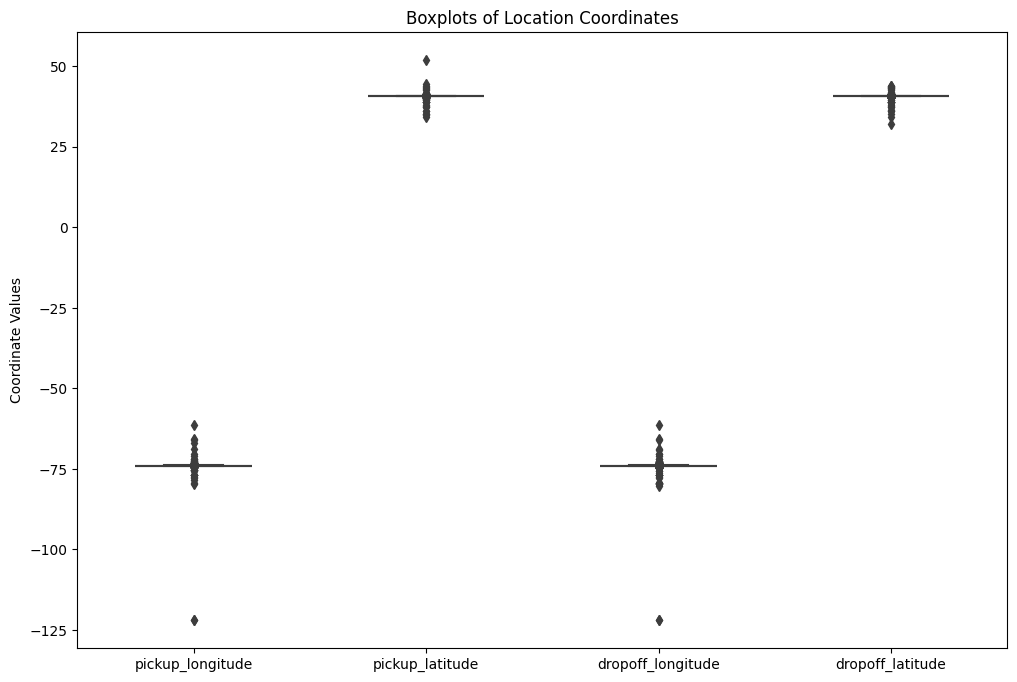

In [17]:
plt.figure(figsize=(12, 8))

sns.boxplot(data=TrainData[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']], width=0.5)
plt.title('Boxplots of Location Coordinates')
plt.ylabel('Coordinate Values')

plt.show()

In [18]:
def remove_outliers(data, column_name):
    Q1 = np.percentile(data[column_name], 25)
    Q3 = np.percentile(data[column_name], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    print(lower_bound)
    print(upper_bound)
    outliers_removed = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]
    return outliers_removed

remove_outliers(TrainData, 'pickup_longitude')
remove_outliers(TrainData, 'pickup_latitude')
remove_outliers(TrainData, 'dropoff_longitude')
remove_outliers(TrainData, 'dropoff_latitude')

-74.06547546386724
-73.89372253417964
40.64430618286133
40.86140060424805
-74.07626342773438
-73.8780746459961
40.63410949707031
40.87158489227295


,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,weekday,pickup_hour,pickup_month,dayMonth
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,0,17,3,14
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,6,0,6,12
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,1,11,1,19
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,2,19,4,6
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,5,13,3,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,778,2016-04-08,4,13,4,8
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,655,2016-01-10,6,7,1,10
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,764,2016-04-22,4,6,4,22
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,373,2016-01-05,1,15,1,5


In [19]:
#TrainData['trip_duration'] = TrainData['trip_duration'].apply(lambda x: math.ceil(x / 60))

In [20]:
print("Max value", TrainData['trip_duration'].max()/3600)
Q1 = TrainData['trip_duration'].quantile(0.25)
Q3 = TrainData['trip_duration'].quantile(0.75)
IQR = Q3 - Q1
whisker_1 = Q1 - (1.5*IQR)
whisker_2 = Q3 + (1.5*IQR)

whisker_1, whisker_2

Max value 979.5227777777778


(-620.0, 2092.0)

In [21]:
print('Rows before :',TrainData.shape[0])
print('Rows before :',TestData.shape[0])
TrainData = TrainData[TrainData['passenger_count'] != 0]
TestData = TestData[TestData['passenger_count'] != 0]
print('Rows after :',TrainData.shape[0])
print('Rows after :',TestData.shape[0])

Rows before : 1458644
Rows before : 625134
Rows after : 1458584
Rows after : 625111


In [22]:
TrainData['store_and_fwd_flag'] = TrainData['store_and_fwd_flag'].replace({'Y' : 1, 'N' : 0})
TestData['store_and_fwd_flag'] = TestData['store_and_fwd_flag'].replace({'Y' : 1, 'N' : 0})

In [23]:
def haversine_distance(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

TrainData['haversine_distance'] = haversine_distance(TrainData['pickup_latitude'].values, TrainData['pickup_longitude'].values, TrainData['dropoff_latitude'].values, TrainData['dropoff_longitude'].values)
TestData['haversine_distance'] = haversine_distance(TestData['pickup_latitude'].values, TestData['pickup_longitude'].values, TestData['dropoff_latitude'].values, TestData['dropoff_longitude'].values)

# **Data Visualizations**

In [24]:
df=TrainData
train_data=TrainData

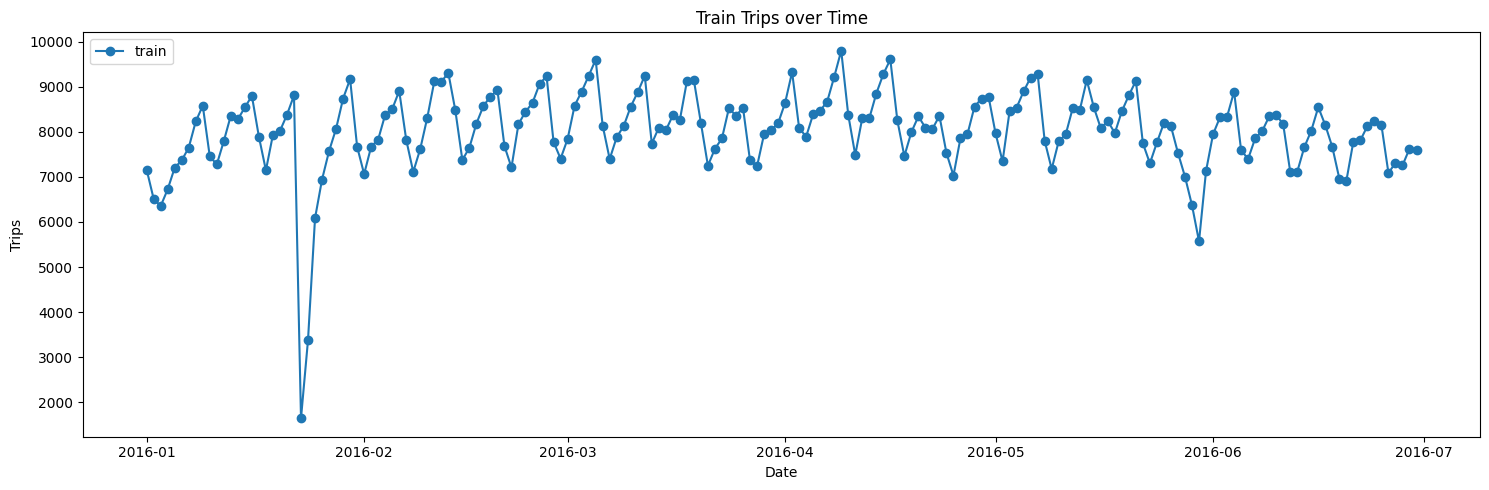

In [25]:
# Trip Counts on each day

TrainData['pickup_date'] = pd.to_datetime(pd.to_datetime(TrainData['pickup_datetime']).dt.date)

fig, ax1 = plt.subplots(1, 1, figsize=(15, 5))

ax1.plot(TrainData.groupby('pickup_date').count()[['vendor_id']], 'o-', label='train')
ax1.set_title('Train Trips over Time')
ax1.legend(loc='upper left')
ax1.set_ylabel('Trips')
ax1.set_xlabel('Date')

plt.tight_layout()
plt.show()

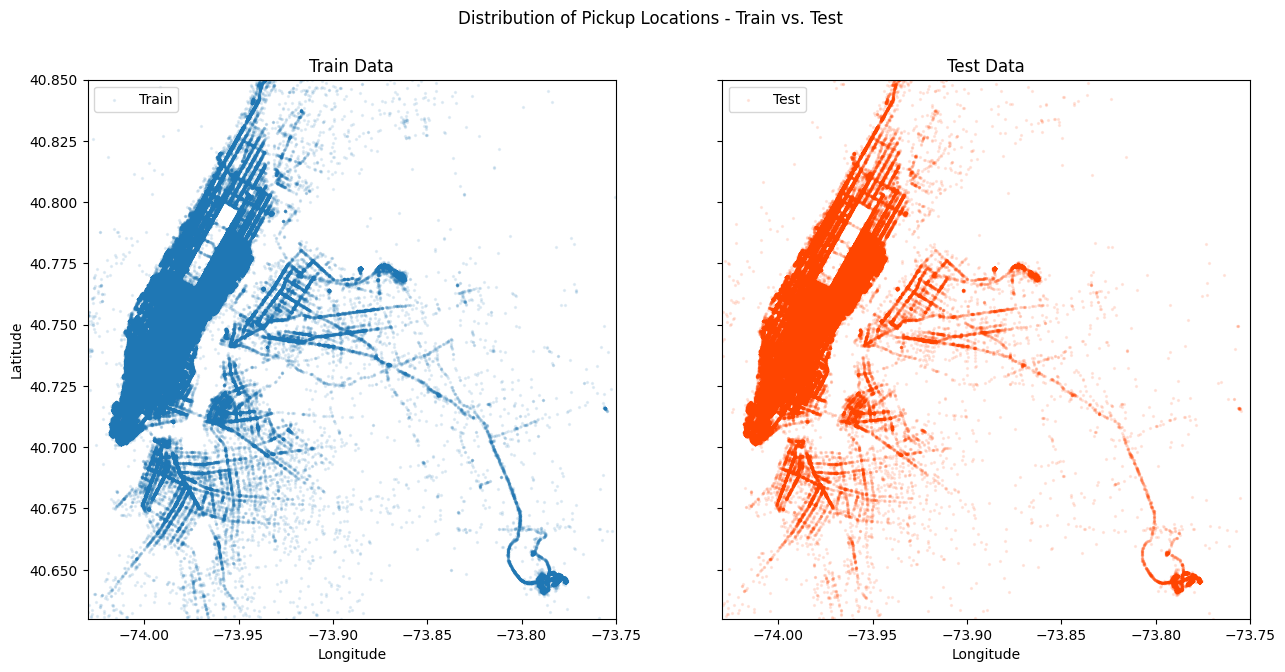

In [26]:
# Distrinution of pickup locations

city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15, 7))

axes[0].scatter(TrainData['pickup_longitude'], TrainData['pickup_latitude'], s=2, label='Train', alpha=0.1)

axes[1].scatter(TestData['pickup_longitude'], TestData['pickup_latitude'], color='orangered', s=2, label='Test', alpha=0.1)

fig.suptitle('Distribution of Pickup Locations - Train vs. Test')
axes[0].set_title('Train Data')
axes[1].set_title('Test Data')
axes[0].set_ylabel('Latitude')
axes[0].set_xlabel('Longitude')
axes[1].set_xlabel('Longitude')
axes[0].legend(loc='upper left')
axes[1].legend(loc='upper left')

plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

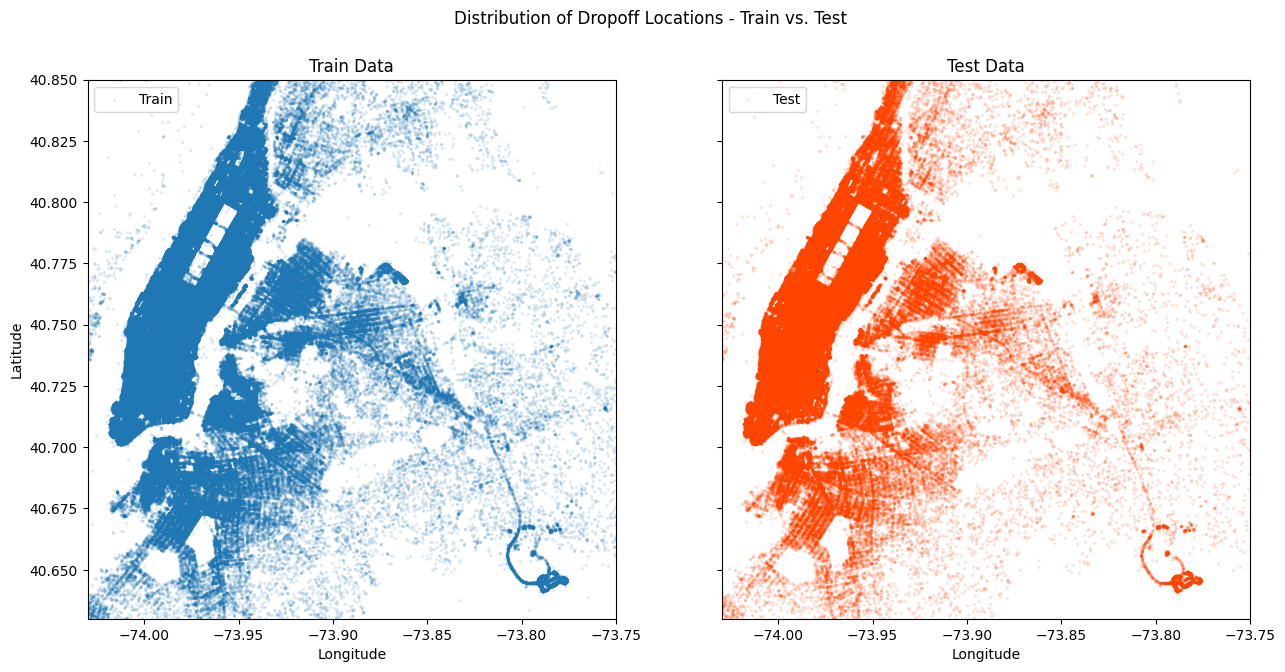

In [27]:
# Distrinution of Dropoff locations

city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15, 7))

axes[0].scatter(TrainData['dropoff_longitude'], TrainData['dropoff_latitude'], s=2, label='Train', alpha=0.1)

axes[1].scatter(TestData['dropoff_longitude'], TestData['dropoff_latitude'], color='orangered', s=2, label='Test', alpha=0.1)

fig.suptitle('Distribution of Dropoff Locations - Train vs. Test')
axes[0].set_title('Train Data')
axes[1].set_title('Test Data')
axes[0].set_ylabel('Latitude')
axes[0].set_xlabel('Longitude')
axes[1].set_xlabel('Longitude')
axes[0].legend(loc='upper left')
axes[1].legend(loc='upper left')

plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

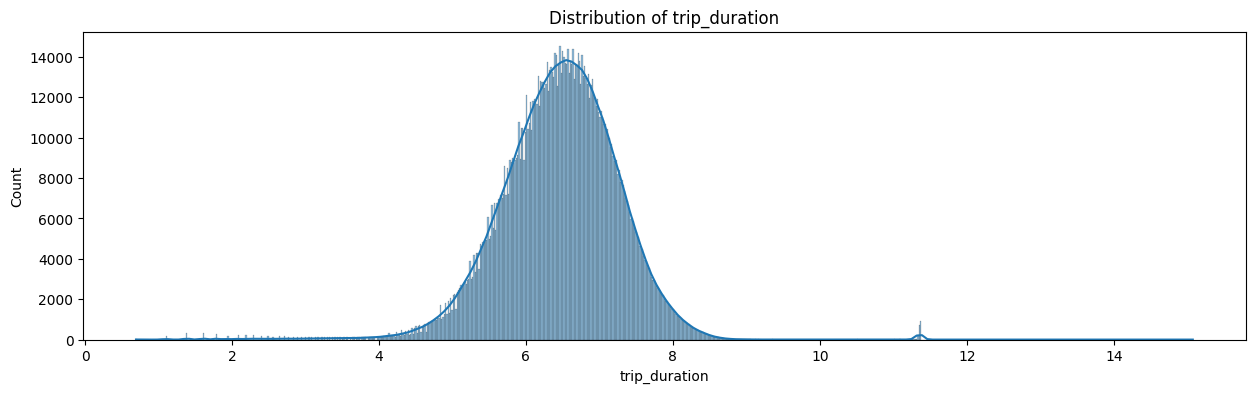

In [28]:
# Trip Duration

fig,ax = plt.subplots(1,1,figsize=(15,4))

hist1 = sns.histplot(data = TrainData, x=np.log(1+TrainData['trip_duration']),ax=ax,kde=True)
hist1.set(title='Distribution of trip_duration')
fig.show()

1453968 1458584


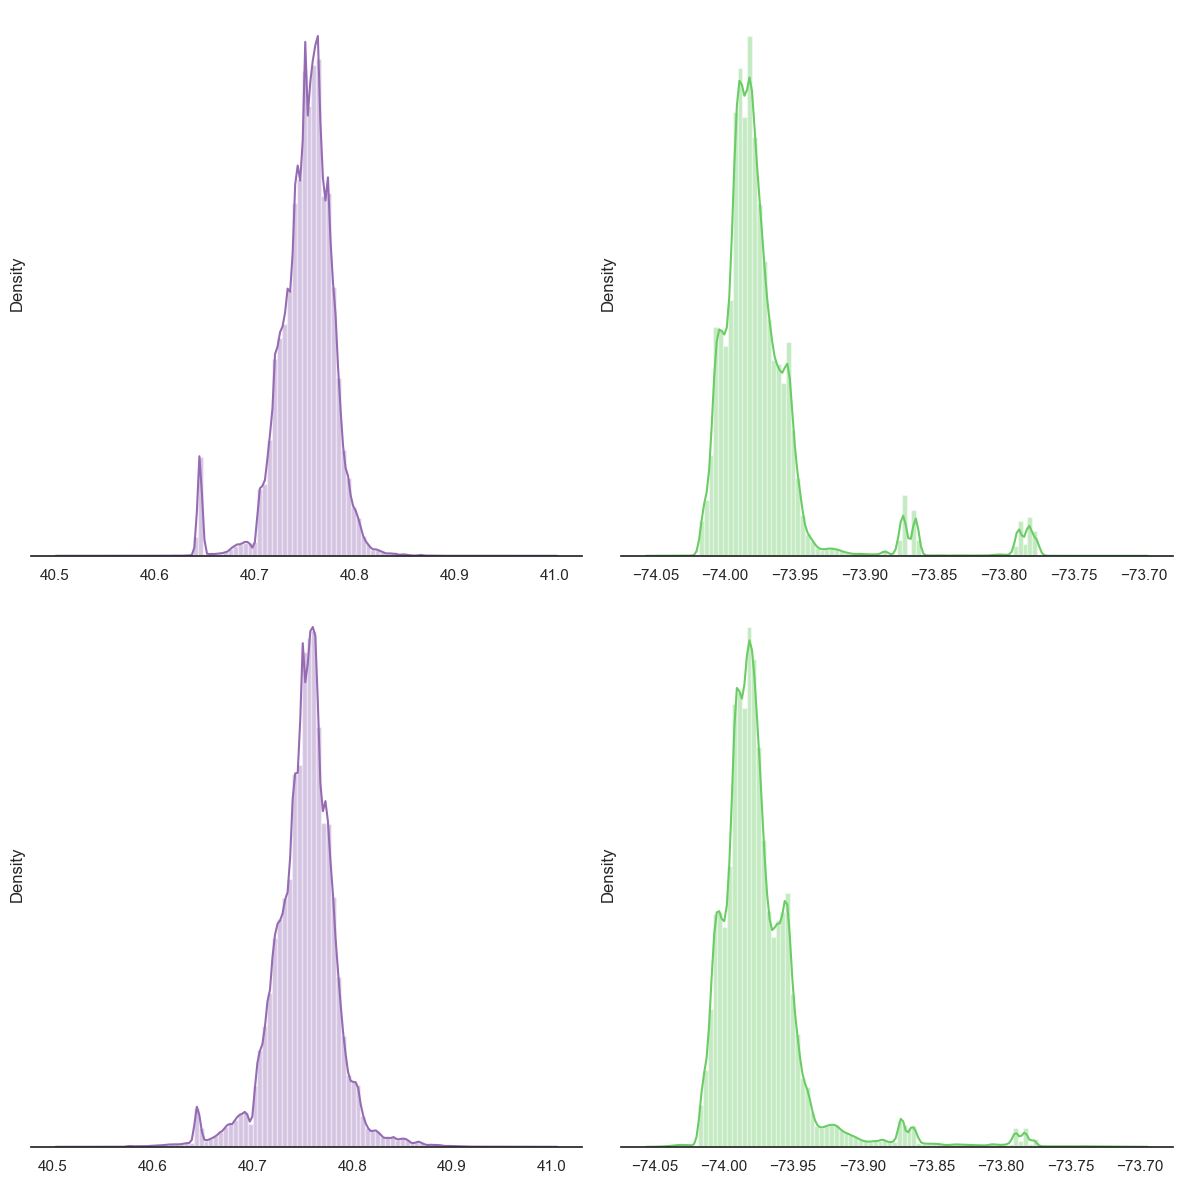

In [29]:
# Distribution of Latitude and Longitudes

train_df = TrainData

df = train_df.loc[(train_df.pickup_latitude > 40.5) & (train_df.pickup_latitude < 41)]
df = df.loc[(df.dropoff_latitude>40.5) & (df.dropoff_latitude < 41)]
df = df.loc[(df.dropoff_longitude > -74.05) & (df.dropoff_longitude < -73.7)]
df = df.loc[(df.pickup_longitude > -74.05) & (df.pickup_longitude < -73.7)]

train_data_new = df.copy()

sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(12, 12), sharex=False, sharey = False)
sns.despine(left=True)
sns.distplot(train_data_new['pickup_latitude'].values, label = 'pickup_latitude',color="m",bins = 100, ax=axes[0,0])
sns.distplot(train_data_new['pickup_longitude'].values, label = 'pickup_longitude',color="g",bins =100, ax=axes[0,1])
sns.distplot(train_data_new['dropoff_latitude'].values, label = 'dropoff_latitude',color="m",bins =100, ax=axes[1, 0])
sns.distplot(train_data_new['dropoff_longitude'].values, label = 'dropoff_longitude',color="g",bins =100, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()

print(df.shape[0], train_data.shape[0])
plt.show()

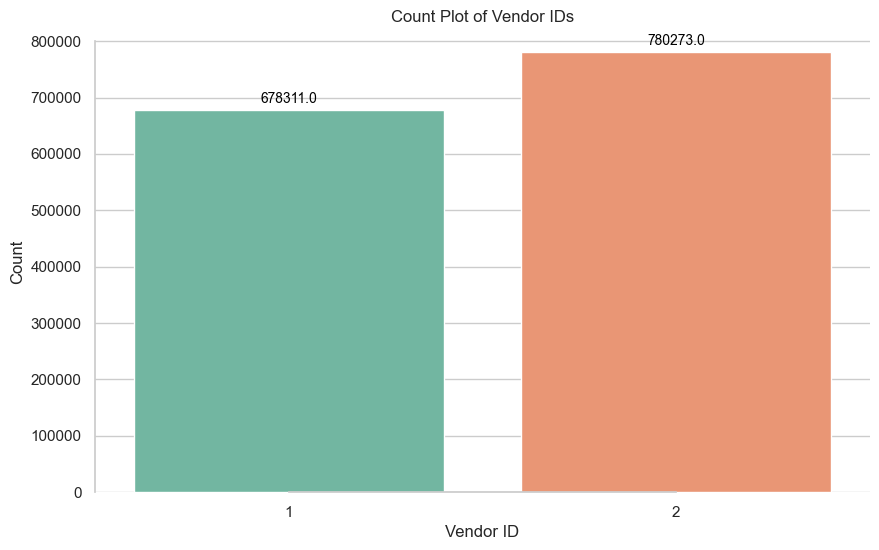

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

plot = sns.countplot(data=TrainData, x='vendor_id', palette='Set2')

for p in plot.patches:
    plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                  textcoords='offset points')

plt.xlabel('Vendor ID')
plt.ylabel('Count')
plt.title('Count Plot of Vendor IDs')

sns.despine(trim=True)
plt.xticks(rotation=0)

plt.show()

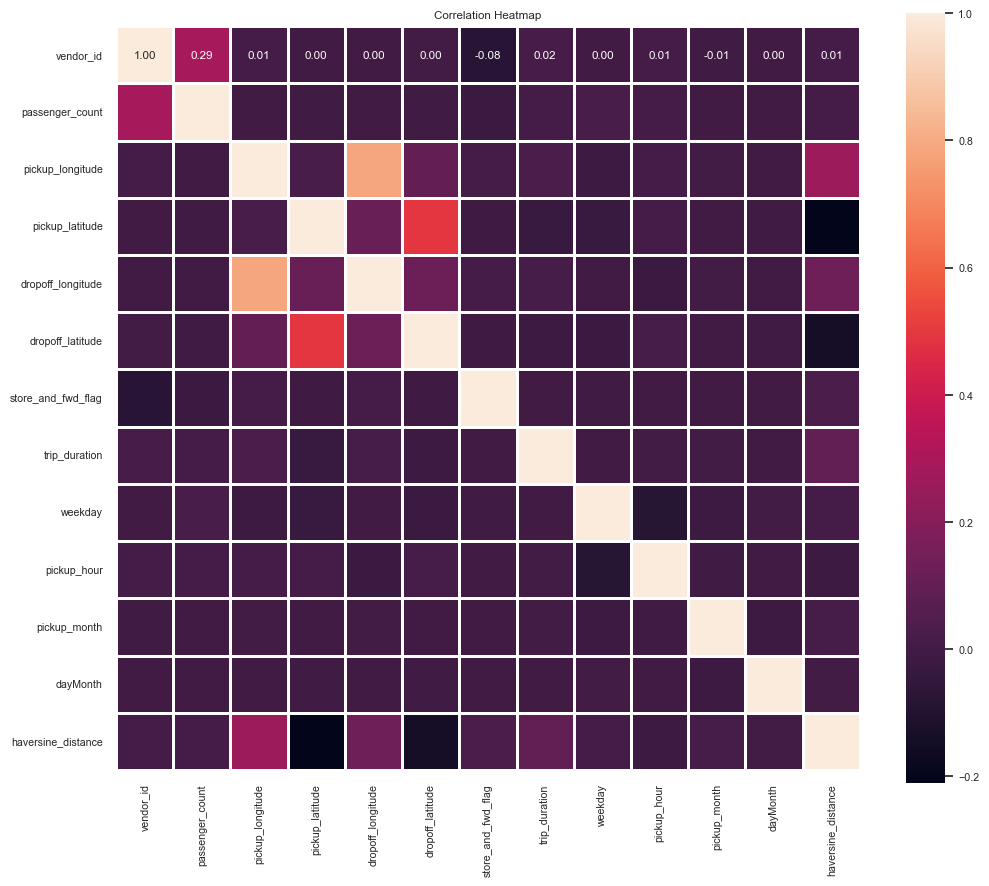

In [31]:
correlation_matrix = TrainData.corr()

plt.figure(figsize=(12, 10))
sns.set(font_scale=0.7)
sns.set_style("whitegrid")

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=1, square=True)

plt.title('Correlation Heatmap')
plt.show()

# **Feature Selection**

In [32]:
# -------------------------------------------------
# Dropping Constant features and non-numeric values
# -------------------------------------------------

TheRealData = TrainData.copy()

TheRealData = TheRealData.select_dtypes(include=['int64', 'float64'])
constant_columns = TheRealData.columns[TheRealData.nunique() == 1]
TheRealData = TheRealData.drop(columns=constant_columns)


TheRealData

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday,pickup_hour,pickup_month,dayMonth,haversine_distance
0,2,1,-73.982155,40.767937,-73.964630,40.765602,0,455,0,17,3,14,1.498521
1,1,1,-73.980415,40.738564,-73.999481,40.731152,0,663,6,0,6,12,1.805507
2,2,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,1,11,1,19,6.385098
3,2,1,-74.010040,40.719971,-74.012268,40.706718,0,429,2,19,4,6,1.485498
4,2,1,-73.973053,40.793209,-73.972923,40.782520,0,435,5,13,3,26,1.188588
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,2,4,-73.982201,40.745522,-73.994911,40.740170,0,778,4,13,4,8,1.225080
1458640,1,1,-74.000946,40.747379,-73.970184,40.796547,0,655,6,7,1,10,6.049836
1458641,2,1,-73.959129,40.768799,-74.004433,40.707371,0,764,4,6,4,22,7.824606
1458642,1,1,-73.982079,40.749062,-73.974632,40.757107,0,373,1,15,1,5,1.092564


In [33]:
# --------------------------------------------------------------------------
# Moving the Label Column to the last and then rearranging the data randomly
# --------------------------------------------------------------------------

# Also dropping suspended accounts

label_column = TheRealData['trip_duration']
TheRealData = TheRealData.drop(columns=['trip_duration'])
TheRealData['trip_duration'] = label_column


TheRealData

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,weekday,pickup_hour,pickup_month,dayMonth,haversine_distance,trip_duration
0,2,1,-73.982155,40.767937,-73.964630,40.765602,0,0,17,3,14,1.498521,455
1,1,1,-73.980415,40.738564,-73.999481,40.731152,0,6,0,6,12,1.805507,663
2,2,1,-73.979027,40.763939,-74.005333,40.710087,0,1,11,1,19,6.385098,2124
3,2,1,-74.010040,40.719971,-74.012268,40.706718,0,2,19,4,6,1.485498,429
4,2,1,-73.973053,40.793209,-73.972923,40.782520,0,5,13,3,26,1.188588,435
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,2,4,-73.982201,40.745522,-73.994911,40.740170,0,4,13,4,8,1.225080,778
1458640,1,1,-74.000946,40.747379,-73.970184,40.796547,0,6,7,1,10,6.049836,655
1458641,2,1,-73.959129,40.768799,-74.004433,40.707371,0,4,6,4,22,7.824606,764
1458642,1,1,-73.982079,40.749062,-73.974632,40.757107,0,1,15,1,5,1.092564,373


In [34]:
# ----------------------------------------------------------------
# Checking if there is any Constant column using VarianceThreshold
# ----------------------------------------------------------------

var_thres = VarianceThreshold(threshold = 0)
var_thres.fit(TheRealData)
var_thres.get_support()

# Drop if any
# -----------

# data.columns[var_thres.get_support()]
# constant_columns = [column for column in data.columns if column not in data.columns[var_thres.get_support()]]
# data.drop(constant_columns,axis=1)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [35]:
TheRealData.corr()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,weekday,pickup_hour,pickup_month,dayMonth,haversine_distance,trip_duration
vendor_id,1.000000,0.287425,0.007823,0.001732,0.001526,0.004484,-0.079859,0.001311,0.009305,-0.006219,0.000726,0.008114,0.020296
passenger_count,0.287425,1.000000,0.002181,-0.005148,-0.000336,-0.002786,-0.021788,0.025206,0.009085,-0.002157,0.001998,0.010280,0.008480
pickup_longitude,0.007823,0.002181,1.000000,0.022592,0.783580,0.100213,0.010803,-0.016357,0.010151,0.004471,-0.000872,0.259792,0.026515
pickup_latitude,0.001732,-0.005148,0.022592,1.000000,0.114913,0.493994,-0.008284,-0.028973,0.010598,-0.001446,-0.006513,-0.210381,-0.029175
dropoff_longitude,0.001526,-0.000336,0.783580,0.114913,1.000000,0.124895,0.008230,-0.001133,-0.022459,0.004751,-0.000454,0.134052,0.014650
dropoff_latitude,0.004484,-0.002786,0.100213,0.493994,0.124895,1.000000,-0.009874,-0.021754,0.013605,-0.000610,-0.005581,-0.142144,-0.020649
store_and_fwd_flag,-0.079859,-0.021788,0.010803,-0.008284,0.008230,-0.009874,1.000000,-0.003956,0.002284,0.000383,0.001101,0.026291,0.001730
weekday,0.001311,0.025206,-0.016357,-0.028973,-0.001133,-0.021754,-0.003956,1.000000,-0.084247,-0.014541,0.004365,0.007609,-0.000687
pickup_hour,0.009305,0.009085,0.010151,0.010598,-0.022459,0.013605,0.002284,-0.084247,1.000000,-0.003440,0.000415,-0.015821,0.003684
pickup_month,-0.006219,-0.002157,0.004471,-0.001446,0.004751,-0.000610,0.000383,-0.014541,-0.003440,1.000000,-0.015141,0.015668,0.006591


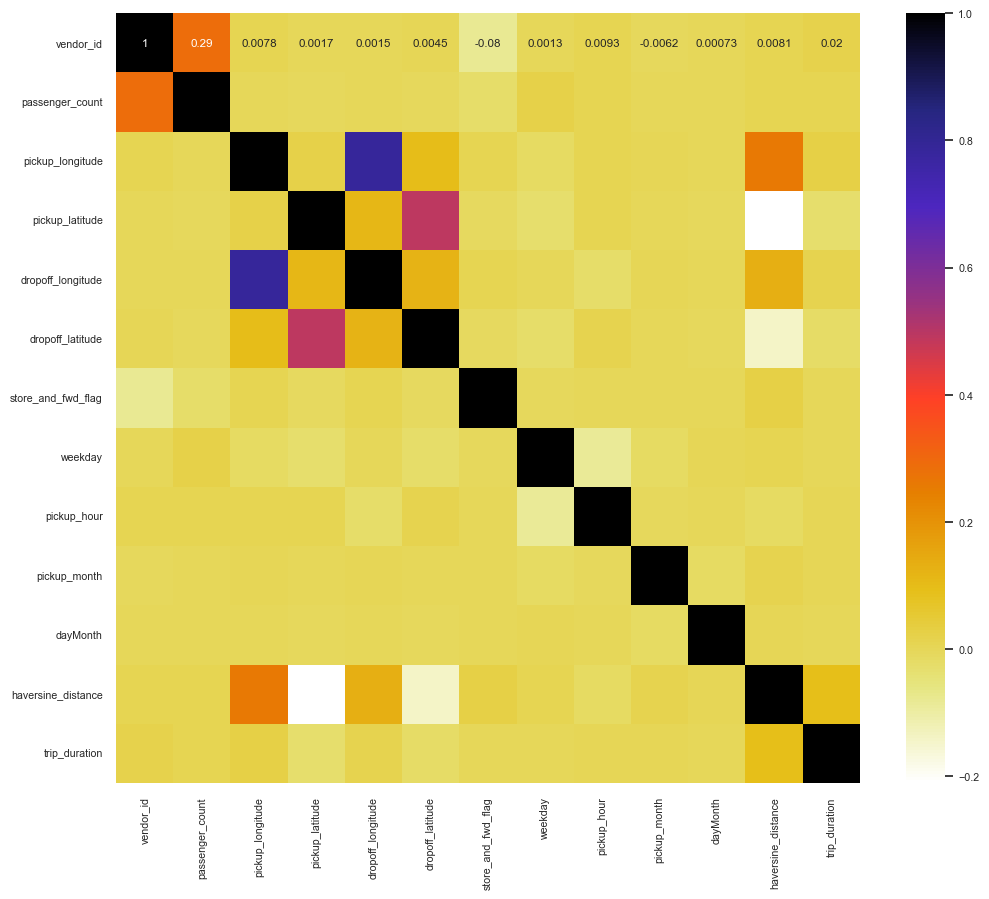

In [36]:
# -------------------------
# Removing multicolinearity
# -------------------------

plt.figure(figsize=(12,10))
cor = TheRealData.corr()
sns.heatmap(cor, cmap=plt.cm.CMRmap_r, annot=True)
plt.show()

In [37]:
def remove_outliers(data, column_name):
    Q1 = np.percentile(data[column_name], 25)
    Q3 = np.percentile(data[column_name], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    print(lower_bound)
    print(upper_bound)
    outliers_removed = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]
    return outliers_removed


    
    """#Winzorisation"
    
    # Cap (limit) values below the lower bound to the lower bound
    data[column_name] = np.where(data[column_name] < lower_bound, lower_bound, data[column_name])

    # Cap (limit) values above the upper bound to the upper bound
    data[column_name] = np.where(data[column_name] > upper_bound, upper_bound, data[column_name])
    """

TrainData=remove_outliers(TrainData, 'pickup_longitude')
TrainData=remove_outliers(TrainData, 'pickup_latitude')
TrainData=remove_outliers(TrainData, 'dropoff_longitude')
TrainData=remove_outliers(TrainData, 'dropoff_latitude')
TrainData=remove_outliers(TrainData, 'trip_duration')

-74.06547546386724
-73.89372253417964
40.65148162841797
40.854183197021484
-74.07444763183594
-73.88085174560547
40.64007568359375
40.86699676513672
-1373.0
2715.0


In [38]:
TrainData = TrainData.drop(columns=['dropoff_longitude', 'dropoff_latitude', 'id', 'store_and_fwd_flag', 'pickup_datetime', 'pickup_date'])
TestData = TestData.drop(columns=['dropoff_longitude', 'dropoff_latitude', 'id', 'store_and_fwd_flag', 'pickup_datetime', 'pickup_date'])

In [39]:
TrainData = TrainData.drop(columns=['dayMonth'])
TestData = TestData.drop(columns=['dayMonth'])

haversine_distance    0.457247
pickup_latitude       0.012013
pickup_longitude      0.009614
pickup_hour           0.009215
weekday               0.004186
pickup_month          0.002412
vendor_id             0.002082
passenger_count       0.001236
dtype: float64


<Axes: >

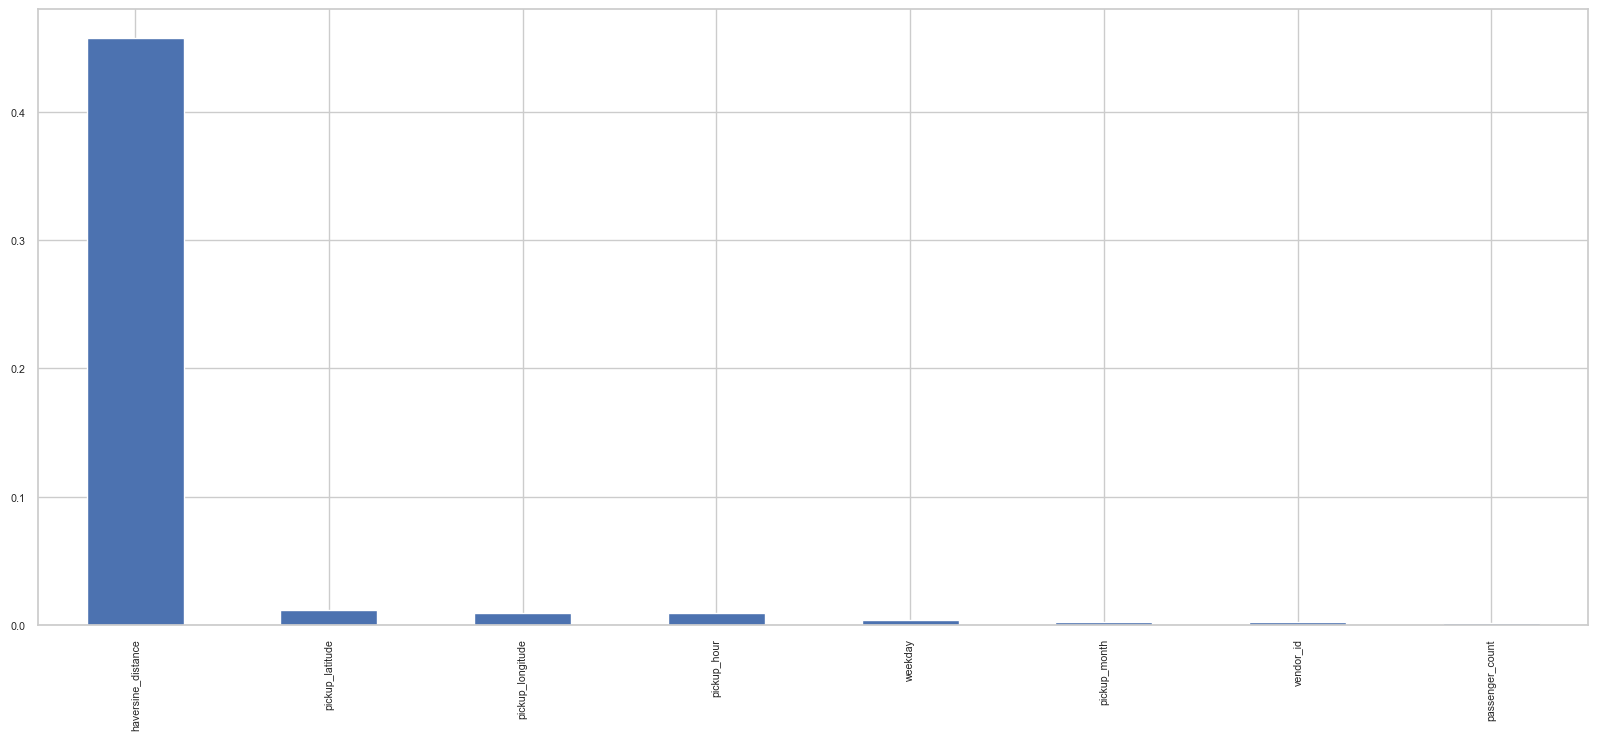

In [40]:
X = TrainData.drop(columns=['trip_duration'])
y = TrainData['trip_duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

mutual_info = mutual_info_classif(X_train, y_train)

mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
print(mutual_info.sort_values(ascending=False))

mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [41]:
TrainData.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'trip_duration', 'weekday', 'pickup_hour', 'pickup_month',
       'haversine_distance'],
      dtype='object')

In [42]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer


In [43]:
import os
import multiprocessing

# Get the number of CPU cores
num_cpus = os.cpu_count()

print(f"Number of CPU cores in your laptop: {num_cpus}")


Number of CPU cores in your laptop: 8


In [44]:
kf = KFold(n_splits=10, shuffle=True, random_state=4305)

In [45]:
mlp = MLPRegressor()
param_grid = {'hidden_layer_sizes': [(3,),(4,),(5,),(6,),(7,),(8,),(9,),(9, 9), (8, 8), (7, 7), (6, 6), (5, 5), (4, 4), (3, 3), (9, 9, 9), (8, 8, 8), (7, 7, 7), (6, 6, 6), (5, 5, 5), (4, 4, 4), (3, 3, 3)],
              'activation': ['relu'],                          
              'learning_rate_init': [0.001, 0.01, 0.1, 0.3, 0.5, 1, 2],              
              'max_iter': [1000],
              'early_stopping': [False],
              'warm_start': [True]
             }

In [46]:
def rmsle(y_true, y_pred):
    return np.sqrt(np.mean(np.square(np.subtract(np.log1p(y_true), np.log1p(y_pred)))))

In [47]:
search_cv = RandomizedSearchCV(mlp, param_grid, scoring=make_scorer(rmsle, greater_is_better=False),
                   cv=kf, verbose=3,n_jobs=8, random_state=42)

verbose=3: This parameter controls the verbosity of the output during the hyperparameter search. A higher value, such as 3, will provide more detailed information about the search process.

pre_dispatch='2*n_jobs': This parameter specifies the number of jobs to dispatch before running the computation. In this case, it's set to '2*n_jobs', which means that the number of jobs dispatched will be determined based on the number of CPU cores available. It helps manage parallel execution.


In [48]:
search_cv.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/var/folders/n5/vm862s_n5p751f9xypymdzw40000gn/T/ipykernel_82368/1448584063.py:2: RuntimeWarning: invalid value encountered in log1p
/var/folders/n5/vm862s_n5p751f9xypymdzw40000gn/T/ipykernel_82368/1448584063.py:2: RuntimeWarning: invalid value encountered in log1p
/var/folders/n5/vm862s_n5p751f9xypymdzw40000gn/T/ipykernel_82368/1448584063.py:2: RuntimeWarning: invalid value encountered in log1p
/var/folders/n5/vm862s_n5p751f9xypymdzw40000gn/T/ipykernel_82368/1448584063.py:2: RuntimeWarning: invalid value encountered in log1p


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=4305, shuffle=True),
                   estimator=MLPRegressor(), n_jobs=8,
                   param_distributions={'activation': ['relu'],
                                        'early_stopping': [False],
                                        'hidden_layer_sizes': [(3,), (4,), (5,),
                                                               (6,), (7,), (8,),
                                                               (9,), (9, 9),
                                                               (8, 8), (7, 7),
                                                               (6, 6), (5, 5),
                                                               (4, 4), (3, 3),
                                                               (9, 9, 9),
                                                               (8, 8, 8),
                                                               (7, 7, 7),
                                                               (6, 6, 6),
                                                               (5, 5, 5),
                                                               (4, 4, 4),
                                                               (3, 3, 3)],
                                        'learning_rate_init': [0.001, 0.01, 0.1,
                                                               0.3, 0.5, 1, 2],
                                        'max_iter': [1000],
                                        'warm_start': [True]},
                   random_state=42,
                   scoring=make_scorer(rmsle, greater_is_better=False),
                   verbose=3)

In [49]:
results = pd.DataFrame(search_cv.cv_results_).sort_values(by='mean_test_score', ascending=False)
results.head(20)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_warm_start,param_max_iter,param_learning_rate_init,param_hidden_layer_sizes,param_early_stopping,param_activation,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
1,67.589050,25.123150,0.070870,0.024237,True,1000,0.1,"(9, 9)",False,relu,...,-0.456403,-0.490559,-0.490746,-0.489737,-0.480618,-0.483114,-0.462077,-0.484115,0.020191,1
9,41.815025,11.577858,0.051881,0.046545,True,1000,0.1,"(4,)",False,relu,...,-0.508846,-0.479420,-0.551639,-0.474222,-0.525323,-0.468287,-0.486474,-0.497993,0.025376,2
7,39.600636,12.139525,0.081757,0.051575,True,1000,0.3,"(7,)",False,relu,...,-0.510058,-0.538729,-0.531465,-0.558886,-0.510506,-0.492314,-0.522124,-0.522829,0.025087,3
8,44.762769,12.568637,0.072754,0.026179,True,1000,0.5,"(5, 5)",False,relu,...,-0.501208,-0.503702,-0.744472,-0.504535,-0.525061,-0.501533,-0.528368,-0.537842,0.070043,4
5,24.395271,6.727169,0.053628,0.027435,True,1000,1,"(4,)",False,relu,...,-0.551504,-0.511053,-0.567137,-0.509782,-0.736894,-0.555086,-0.735342,-0.592798,0.096180,5
3,22.245912,6.040664,0.053825,0.021777,True,1000,1,"(5,)",False,relu,...,-0.497529,-0.734355,-0.735515,-0.737610,-0.736962,-0.570396,-0.734864,-0.672457,0.098058,6
0,22.758047,9.747841,0.074132,0.026028,True,1000,2,"(6, 6, 6)",False,relu,...,-0.735016,-0.737287,-0.737844,-0.733357,-0.734220,-0.732251,-0.732649,-0.735537,0.002280,7
6,43.348169,13.646893,0.078411,0.039613,True,1000,2,"(6, 6)",False,relu,...,-0.733490,-0.736841,-0.737170,-0.734712,-0.737595,-0.733860,-0.734644,-0.735834,0.001661,8
4,51.766060,16.999921,0.070073,0.028145,True,1000,2,"(9, 9, 9)",False,relu,...,-0.737034,-0.740796,-0.736595,-0.732730,-0.736996,-0.733950,-0.732615,-0.735872,0.002380,9
2,28.950217,6.136632,0.078734,0.028465,True,1000,1,"(4, 4, 4)",False,relu,...,-0.734982,-0.738786,-0.734911,-0.736305,-0.737246,-0.734994,-0.735775,-0.735925,0.001385,10


In [50]:
search_cv.best_estimator_

MLPRegressor(hidden_layer_sizes=(9, 9), learning_rate_init=0.1, max_iter=1000,
             warm_start=True)

In [51]:
import pickle

# Assuming you've already trained and found the best estimator
best_estimator = search_cv.best_estimator_

# Define a file path where you want to save the best estimator
model_filename = "best_estimator_mlp.pkl"

# Save the best estimator to a file using pickle
with open(model_filename, 'wb') as model_file:
    pickle.dump(best_estimator, model_file)

print(f"Best estimator saved to {model_filename}")

Best estimator saved to best_estimator_mlp.pkl


In [52]:
y_pred = search_cv.best_estimator_.predict(X_test)

In [53]:
rmsle(y_pred,y_test)

0.48012543955406417

PATE


In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Number of clients
num_clients = 5

# Define a function to split the data for each client
def split_data_for_client(client_id):
    start = int(client_id * len(X_train) / num_clients)
    end = int((client_id + 1) * len(X_train) / num_clients)
    client_X_train = X_train[start:end]
    client_y_train = y_train[start:end]
    return client_X_train, client_y_train

# Create dictionaries to store data
client_data = {}

# Split the data and store it for all clients
for client_id in range(num_clients):
    client_X_train, client_y_train = split_data_for_client(client_id)
    
    # Store the split data for each client
    client_data1 = {
        'X_train': client_X_train,
        'y_train': client_y_train,
    }
    client_data[client_id] = client_data1



In [55]:
X_test.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'weekday', 'pickup_hour', 'pickup_month', 'haversine_distance'],
      dtype='object')

In [56]:
client_predictions = {}

# Fit models and make predictions for each client
noise_level=0.1
for client_id in range(num_clients):
    client_data1 = client_data[client_id]
    client_X_train = client_data1['X_train']
    client_y_train = client_data1['y_train']

    
    # Train a local model on each client's data
    search_cv.fit(client_X_train, client_y_train)
    
    model_filename = "FL_Client " + str(client_id)
    
    with open(model_filename, 'wb') as model_file:
        pickle.dump(search_cv.best_estimator_, model_file)
    print(f"Local model for client {client_id} saved to {model_filename}")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/var/folders/n5/vm862s_n5p751f9xypymdzw40000gn/T/ipykernel_82368/1448584063.py:2: RuntimeWarning: invalid value encountered in log1p
/var/folders/n5/vm862s_n5p751f9xypymdzw40000gn/T/ipykernel_82368/1448584063.py:2: RuntimeWarning: invalid value encountered in log1p
/var/folders/n5/vm862s_n5p751f9xypymdzw40000gn/T/ipykernel_82368/1448584063.py:2: RuntimeWarning: invalid value encountered in log1p
/var/folders/n5/vm862s_n5p751f9xypymdzw40000gn/T/ipykernel_82368/1448584063.py:2: RuntimeWarning: invalid value encountered in log1p


Local model for client 0 saved to FL_Client 0
Fitting 10 folds for each of 10 candidates, totalling 100 fits


/var/folders/n5/vm862s_n5p751f9xypymdzw40000gn/T/ipykernel_82368/1448584063.py:2: RuntimeWarning: invalid value encountered in log1p
/var/folders/n5/vm862s_n5p751f9xypymdzw40000gn/T/ipykernel_82368/1448584063.py:2: RuntimeWarning: invalid value encountered in log1p


Local model for client 1 saved to FL_Client 1
Fitting 10 folds for each of 10 candidates, totalling 100 fits


/var/folders/n5/vm862s_n5p751f9xypymdzw40000gn/T/ipykernel_82368/1448584063.py:2: RuntimeWarning: invalid value encountered in log1p
/var/folders/n5/vm862s_n5p751f9xypymdzw40000gn/T/ipykernel_82368/1448584063.py:2: RuntimeWarning: invalid value encountered in log1p
/var/folders/n5/vm862s_n5p751f9xypymdzw40000gn/T/ipykernel_82368/1448584063.py:2: RuntimeWarning: invalid value encountered in log1p
/var/folders/n5/vm862s_n5p751f9xypymdzw40000gn/T/ipykernel_82368/1448584063.py:2: RuntimeWarning: invalid value encountered in log1p


Local model for client 2 saved to FL_Client 2
Fitting 10 folds for each of 10 candidates, totalling 100 fits


/var/folders/n5/vm862s_n5p751f9xypymdzw40000gn/T/ipykernel_82368/1448584063.py:2: RuntimeWarning: invalid value encountered in log1p
/var/folders/n5/vm862s_n5p751f9xypymdzw40000gn/T/ipykernel_82368/1448584063.py:2: RuntimeWarning: invalid value encountered in log1p
/var/folders/n5/vm862s_n5p751f9xypymdzw40000gn/T/ipykernel_82368/1448584063.py:2: RuntimeWarning: invalid value encountered in log1p
/var/folders/n5/vm862s_n5p751f9xypymdzw40000gn/T/ipykernel_82368/1448584063.py:2: RuntimeWarning: invalid value encountered in log1p
/var/folders/n5/vm862s_n5p751f9xypymdzw40000gn/T/ipykernel_82368/1448584063.py:2: RuntimeWarning: invalid value encountered in log1p
/var/folders/n5/vm862s_n5p751f9xypymdzw40000gn/T/ipykernel_82368/1448584063.py:2: RuntimeWarning: invalid value encountered in log1p
/var/folders/n5/vm862s_n5p751f9xypymdzw40000gn/T/ipykernel_82368/1448584063.py:2: RuntimeWarning: invalid value encountered in log1p


Local model for client 3 saved to FL_Client 3
Fitting 10 folds for each of 10 candidates, totalling 100 fits


/var/folders/n5/vm862s_n5p751f9xypymdzw40000gn/T/ipykernel_82368/1448584063.py:2: RuntimeWarning: invalid value encountered in log1p
/var/folders/n5/vm862s_n5p751f9xypymdzw40000gn/T/ipykernel_82368/1448584063.py:2: RuntimeWarning: invalid value encountered in log1p
/var/folders/n5/vm862s_n5p751f9xypymdzw40000gn/T/ipykernel_82368/1448584063.py:2: RuntimeWarning: invalid value encountered in log1p
/var/folders/n5/vm862s_n5p751f9xypymdzw40000gn/T/ipykernel_82368/1448584063.py:2: RuntimeWarning: invalid value encountered in log1p


Local model for client 4 saved to FL_Client 4


In [57]:
import pickle

# Initialize dictionaries to store client models and predictions
client_predictions = {}
client_models = {}

# Load local models for each client
for client_id in range(num_clients):
    model_filename = f"FL_Client {client_id}"
    with open(model_filename, 'rb') as model_file:
        local_model = pickle.load(model_file)
    client_models[client_id] = local_model

noise_level=0

# Make predictions for each client using the loaded models
for client_id in range(num_clients):
    local_model = client_models[client_id]    
    client_pred = local_model.predict(X_test)
    client_predictions[client_id] = client_pred

# Merge predictions (e.g., averaging)
global_prediction = np.mean([client_predictions[client_id] for client_id in range(num_clients)], axis=0)

# Evaluate the global prediction
rmsle_value = rmsle(y_test, global_prediction)
print("RMSLE for the global prediction without noise: ", rmsle_value)

RMSLE for the global prediction without noise:  0.4618189360646251


In [58]:
import pickle

# Initialize dictionaries to store client models and predictions
client_predictions = {}
client_models = {}

# Load local models for each client
for client_id in range(num_clients):
    model_filename = f"FL_Client {client_id}"
    with open(model_filename, 'rb') as model_file:
        local_model = pickle.load(model_file)
    client_models[client_id] = local_model


# Make predictions for each client using the loaded models
for client_id in range(num_clients):
    local_model = client_models[client_id]    
    client_pred = local_model.predict(X_test)
    client_predictions[client_id] = client_pred

noise_level=0.2
for client_id in range(num_clients):
    for j in range(len(client_predictions[0])):
        noise = np.random.uniform(-noise_level, noise_level)
        client_predictions[client_id][j]=client_predictions[client_id][j]+noise
    
# Merge predictions (e.g., averaging)
global_prediction = np.mean([client_predictions[client_id] for client_id in range(num_clients)], axis=0)

# Evaluate the global prediction
rmsle_value = rmsle(y_test, global_prediction)
print("RMSLE for the global prediction with noise: ", rmsle_value)

RMSLE for the global prediction with noise:  0.46181933607527226


In [59]:
"""Sample point"""

'Sample point'

In [60]:
data = [[2, 1, -73.947563, 40.770859, 1, 7, 6, 5.429533]]

numpy_array = np.array(data)

In [61]:
prediction={}
prediction1={}
for client_id in range(num_clients):
    local_model = client_models[client_id]    
    client_pred = local_model.predict(numpy_array)
    prediction[client_id] = client_pred

noise_level=0.2
for client_id in range(num_clients):
    noise = np.random.uniform(-noise_level, noise_level)
    prediction1[client_id]=prediction[client_id]+noise
    
global_prediction = np.mean([prediction1[client_id] for client_id in range(num_clients)], axis=0)
#rmsle_value = rmsle(y_test, global_prediction)
#print("RMSLE for the global prediction:", rmsle_value)

In [62]:
global_prediction

array([1309.05808339])

In [63]:
np.array(y_test)[0]

1041

In [64]:
rmsle(global_prediction,np.array(y_test)[0])

0.22892953136759697

In [65]:
X_train

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,weekday,pickup_hour,pickup_month,haversine_distance
388637,2,1,-73.975922,40.760891,1,13,2,1.370041
39434,2,5,-73.992683,40.743229,6,23,6,1.664948
262949,2,1,-73.971519,40.760502,0,20,4,2.054805
780096,1,1,-73.944702,40.780369,1,6,1,1.091333
621011,2,1,-73.997864,40.736320,5,11,5,1.786647
...,...,...,...,...,...,...,...,...
394133,1,1,-73.982292,40.777290,6,4,5,2.276749
166790,2,1,-73.982094,40.775780,5,21,3,2.037089
1055514,2,2,-73.967262,40.793259,0,19,6,1.768857
129170,1,1,-74.001045,40.731560,0,23,5,1.548623


In [66]:
X_test.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'weekday', 'pickup_hour', 'pickup_month', 'haversine_distance'],
      dtype='object')